In [32]:
import tensorflow as tf
import torch
#from torch.utils import datasets
from google.colab import drive
import pandas as pd

In [33]:
#drive.mount('/content/gdrive')


In [34]:
data=[[1,2],[3,4]]
x_data=torch.tensor(data)
print(x_data.type)
print(x_data)

<built-in method type of Tensor object at 0x7a584461b6f0>
tensor([[1, 2],
        [3, 4]])


In [35]:
import numpy as np
np_array=np.array(data)
x_np=torch.from_numpy(np_array)
x_ones=torch.ones_like(x_data)
print(f"Ones Tensor: \n {x_ones} \n")
x_rand=torch.rand_like(x_ones,dtype=torch.float)
print(f"Rand Tensor: \n {x_rand} \n")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Rand Tensor: 
 tensor([[0.2353, 0.9260],
        [0.3007, 0.7797]]) 



In [36]:
tensor = torch.rand(3,4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")


Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


In [37]:
tensor=torch.ones(4,4)
print(f"First row:{tensor[0]}")
print(f"First column:{tensor[:,0]}")
print(f"First column:{tensor[...,-1]}")
tensor[:,1]=0
print(tensor)

First row:tensor([1., 1., 1., 1.])
First column:tensor([1., 1., 1., 1.])
First column:tensor([1., 1., 1., 1.])
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


In [38]:
torch.cat([tensor,tensor,tensor,tensor],dim=1)

tensor([[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.]])

In [39]:
y1=tensor@tensor.T
print(y1)
y2=tensor.matmul(tensor.T)
print(y2)
y3=torch.rand_like(y2)
print(y3)
torch.matmul(tensor,tensor.T,out=y3)

tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]])
tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]])
tensor([[0.0750, 0.5656, 0.5935, 0.2868],
        [0.3871, 0.2140, 0.1145, 0.4562],
        [0.2828, 0.8444, 0.3303, 0.9917],
        [0.2404, 0.3661, 0.5677, 0.0733]])


tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]])

In [40]:
z1=tensor*tensor
print(z1)
z2=tensor.mul(tensor)
print(z2)
z3=torch.rand_like(tensor)
torch.mul(tensor,tensor,out=z3)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])

In [41]:
agg=tensor.sum()
print(agg)
agg_item=agg.item()
print(agg_item,type(agg_item))

tensor(12.)
12.0 <class 'float'>


In [42]:
from torch.utils.data import dataset
from torchvision import datasets
from torchvision.transforms import ToTensor,Lambda
import matplotlib.pyplot as plt

In [43]:
device=(
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cpu device


In [44]:
training_data=datasets.FashionMNIST(
    root="Data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0,torch.tensor(y), value=1))
)

In [45]:
test_data=datasets.FashionMNIST(
    root="Data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
)

54557
20185
1498
2250
49727
42682
3103
27579
11498


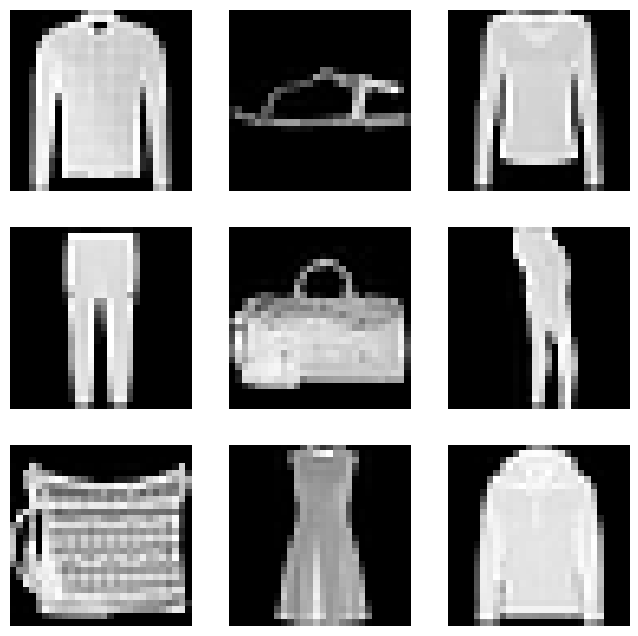

In [46]:
labels_map={
    0:"T-Shirt",
    1:"Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure=plt.figure(figsize=(8,8))
cols,rows=3,3
for i in range(1,cols*rows+1):
    sample_idx=torch.randint(len(training_data),size=(1,)).item()
    print(sample_idx)
    img,label=training_data[sample_idx]
    figure.add_subplot(rows,cols,i)
    #plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(),cmap="gray")
plt.show()



In [47]:
from torch.utils.data import DataLoader
train_dataloader=DataLoader(training_data,batch_size=64,shuffle=True)
test_dataloader=DataLoader(test_data,batch_size=64,shuffle=True)

Feature batch shape:torch.Size([64, 1, 28, 28])
Label batch shape:torch.Size([64, 10])


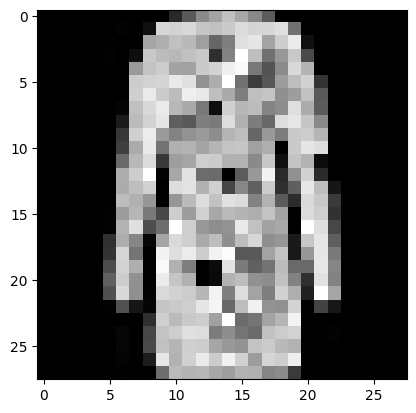

Label: tensor([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.])


In [48]:
train_features,train_labels=next(iter(train_dataloader))
print(f"Feature batch shape:{train_features.size()}")
print(f"Label batch shape:{train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

In [49]:
from torch import nn
class NeuralNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    self.flatten=nn.Flatten()
    self.linear_relu_stack= nn.Sequential(
        nn.Linear(28*28,512),
        nn.ReLU(),
        nn.Linear(512,512),
        nn.ReLU(),
        nn.Linear(512,10),
    )
  def forward(self, x):
    x=self.flatten(x)
    logits=self.linear_relu_stack(x)
    return logits

In [50]:
model = NeuralNetwork().to(device)
print(model)
! pip install torchinfo
from torchinfo import summary

summary(model, input_size=(1, 28, 28), col_names=['input_size', 'output_size', 'num_params'], depth=2)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


Layer (type:depth-idx)                   Input Shape               Output Shape              Param #
NeuralNetwork                            [1, 28, 28]               [1, 10]                   --
├─Flatten: 1-1                           [1, 28, 28]               [1, 784]                  --
├─Sequential: 1-2                        [1, 784]                  [1, 10]                   --
│    └─Linear: 2-1                       [1, 784]                  [1, 512]                  401,920
│    └─ReLU: 2-2                         [1, 512]                  [1, 512]                  --
│    └─Linear: 2-3                       [1, 512]                  [1, 512]                  262,656
│    └─ReLU: 2-4                         [1, 512]                  [1, 512]                  --
│    └─Linear: 2-5                       [1, 512]                  [1, 10]                   5,130
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
Total mult-adds (M): 0.67
Input size (MB): 0.0

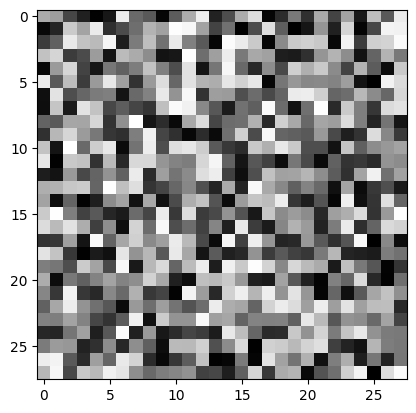

Predicted class: tensor([6])


In [51]:
X=torch.rand(1,28,28,device=device)

plt.imshow((X.squeeze()).detach().cpu().numpy(),cmap="gray")
plt.show()

logits=model(X)
pred_probab=nn.Softmax(dim=1)(logits)
y_pred=pred_probab.argmax(1)
print(f"Predicted class: {y_pred}")

In [52]:
input_image = torch.rand(3,28,28)
print(input_image[0].size())

torch.Size([28, 28])


In [53]:
flatten = nn.Flatten()
flat_image = flatten(input_image)
print(flat_image.size())

torch.Size([3, 784])


In [54]:
layer1 = nn.Linear(in_features=28*28, out_features=20)
hidden1 = layer1(flat_image)
print(hidden1.flatten())

tensor([-0.5727, -0.0566,  0.5945, -0.6089, -0.3799,  0.3645, -0.1345,  0.3640,
        -0.7468, -0.1120,  0.0477,  0.2982,  0.3132,  0.0693,  0.1938,  0.1370,
        -0.3669, -0.2142,  0.2348, -0.1928, -0.4254, -0.2550,  0.4772, -0.2529,
        -0.0130, -0.0279, -0.3521,  0.5790, -0.3484, -0.0622,  0.1048,  0.1664,
         0.5273, -0.3170,  0.2922,  0.2350, -0.2519, -0.0947,  0.0961, -0.3049,
        -0.7758, -0.2688,  0.3899, -0.1644, -0.0235,  0.2751, -0.7370,  0.3528,
        -0.9481, -0.3307,  0.4050,  0.4984,  0.0474, -0.2363,  0.1699,  0.2969,
        -0.6719, -0.1611,  0.0994, -0.3230], grad_fn=<ReshapeAliasBackward0>)


In [55]:
print(f"Before ReLU: {hidden1}\n\n")
hidden1 = nn.ReLU()(hidden1)
print(f"After ReLU: {hidden1}")

Before ReLU: tensor([[-0.5727, -0.0566,  0.5945, -0.6089, -0.3799,  0.3645, -0.1345,  0.3640,
         -0.7468, -0.1120,  0.0477,  0.2982,  0.3132,  0.0693,  0.1938,  0.1370,
         -0.3669, -0.2142,  0.2348, -0.1928],
        [-0.4254, -0.2550,  0.4772, -0.2529, -0.0130, -0.0279, -0.3521,  0.5790,
         -0.3484, -0.0622,  0.1048,  0.1664,  0.5273, -0.3170,  0.2922,  0.2350,
         -0.2519, -0.0947,  0.0961, -0.3049],
        [-0.7758, -0.2688,  0.3899, -0.1644, -0.0235,  0.2751, -0.7370,  0.3528,
         -0.9481, -0.3307,  0.4050,  0.4984,  0.0474, -0.2363,  0.1699,  0.2969,
         -0.6719, -0.1611,  0.0994, -0.3230]], grad_fn=<AddmmBackward0>)


After ReLU: tensor([[0.0000, 0.0000, 0.5945, 0.0000, 0.0000, 0.3645, 0.0000, 0.3640, 0.0000,
         0.0000, 0.0477, 0.2982, 0.3132, 0.0693, 0.1938, 0.1370, 0.0000, 0.0000,
         0.2348, 0.0000],
        [0.0000, 0.0000, 0.4772, 0.0000, 0.0000, 0.0000, 0.0000, 0.5790, 0.0000,
         0.0000, 0.1048, 0.1664, 0.5273, 0.0000, 0.29

In [56]:
seq_modules = nn.Sequential(
    flatten,
    layer1,
    nn.ReLU(),
    nn.Linear(20, 10)
)
input_image = torch.rand(3,28,28)
logits = seq_modules(input_image)


In [57]:
softmax = nn.Softmax(dim=1)
pred_probab = softmax(logits)
print(pred_probab)

tensor([[0.0807, 0.1356, 0.0941, 0.0680, 0.0923, 0.1280, 0.0966, 0.1195, 0.0991,
         0.0862],
        [0.1023, 0.1360, 0.0856, 0.0829, 0.0937, 0.1218, 0.0895, 0.1110, 0.0915,
         0.0857],
        [0.1069, 0.1400, 0.0934, 0.0810, 0.0890, 0.1169, 0.0856, 0.1058, 0.0939,
         0.0875]], grad_fn=<SoftmaxBackward0>)


In [58]:
print(f"Model structure: {model}\n\n")

for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")

Model structure: NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


Layer: linear_relu_stack.0.weight | Size: torch.Size([512, 784]) | Values : tensor([[ 0.0324, -0.0316,  0.0293,  ..., -0.0333,  0.0230,  0.0263],
        [-0.0004, -0.0318, -0.0260,  ..., -0.0347, -0.0252, -0.0198]],
       grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.0.bias | Size: torch.Size([512]) | Values : tensor([0.0008, 0.0114], grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.2.weight | Size: torch.Size([512, 512]) | Values : tensor([[ 0.0297, -0.0352, -0.0200,  ..., -0.0272, -0.0111, -0.0272],
        [-0.0415,  0.0284,  0.0205,  ...,  0.0187, -0.0347,  0.0248]],
       grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.2.bias | Si

In [59]:
learning_rate = 1e-3
batch_size = 64
epochs = 5


In [60]:
def train_loop(dataloader,model,loss_fn,optimizer):
  size=len(dataloader.dataset)
  model.train()
  for batch,(X,y) in enumerate(dataloader):

       pred=model(X)
       loss=loss_fn(pred,y)
       loss.backward()
       optimizer.step()
       optimizer.zero_grad()
       if(batch%100==0):
          loss,current=loss.item(),(batch+1)*len(X)
          print(f"batch:{batch:>3d},loss:{loss:>7f}[{current:>5d}/{size:5d}]")


In [61]:
def test_loop(dataloader,model,loss_fn):
  model.eval()
  size=len(dataloader.dataset)
  num_batches=len(dataloader)
  test_loss,correct=0,0
  with torch.no_grad():
    for X,y in dataloader:
      pred=model(X)
      #print(pred)
      #print(y.shape)
      test_loss+=loss_fn(pred,y).item()
      #print(test_loss)
      #estimate_label=pred.argmax(1)
      #estimate_label.reshape(-1,1)
      #print(estimate_label.shape)
      #y_est=torch.ones(64,10,dtype=torch.float)
      #y_out=torch.zeros(64,10,dtype=torch.float)
      #pred_est=y_out.scatter_(0,estimate_label,y_est)
      #for i in range(64):
      #  y_out[i][estimate_label[i][0]]=1.0
      correct+=(pred.argmax(1)==y.argmax(1)).type(torch.float).sum().item()
  test_loss/=num_batches
  correct/=size
  print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [31]:
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=learning_rate)
epochs=10
for t in range(epochs):
  print(f"Epoch {t+1}\n-------------------------------")
    #model.to('cuda')
  train_loop(train_dataloader, model, loss_fn, optimizer)
  test_loop(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
batch:  0,loss:2.310195[   64/60000]
batch:100,loss:0.668912[ 6464/60000]
batch:200,loss:0.382464[12864/60000]
batch:300,loss:0.338507[19264/60000]
batch:400,loss:0.381913[25664/60000]
batch:500,loss:0.360867[32064/60000]
batch:600,loss:0.564956[38464/60000]
batch:700,loss:0.491099[44864/60000]
batch:800,loss:0.533502[51264/60000]
batch:900,loss:0.272448[57664/60000]
Test Error: 
 Accuracy: 84.0%, Avg loss: 0.435437 

Epoch 2
-------------------------------
batch:  0,loss:0.390322[   64/60000]
batch:100,loss:0.329967[ 6464/60000]
batch:200,loss:0.401259[12864/60000]
batch:300,loss:0.265678[19264/60000]
batch:400,loss:0.407627[25664/60000]
batch:500,loss:0.324252[32064/60000]
batch:600,loss:0.292794[38464/60000]
batch:700,loss:0.422442[44864/60000]
batch:800,loss:0.401826[51264/60000]
batch:900,loss:0.326676[57664/60000]
Test Error: 
 Accuracy: 86.8%, Avg loss: 0.353382 

Epoch 3
-------------------------------
batch:  0,loss:0.391778[   64/60000]